In [7]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt

In [8]:
DATASET_PATH = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey"
IMG_SIZE = (128, 128)  # Resize images
BATCH_SIZE = 16
NUM_CLASSES = 5  # Adjust based on dataset categories
EPOCHS = 3

In [9]:
def load_datasets(dataset_path, img_size, batch_size):
    train_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    )

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
    val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))
    test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))
    return train_dataset, val_dataset, test_dataset

# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [10]:
# Load datasets
train_ds, val_ds, test_ds = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)

Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.


In [11]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2)
])

In [12]:
# VGG16 Architecture

def create_vgg16(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze base model
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [13]:
def compile_and_train(model, train_dataset, val_dataset, epochs):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
    return history

def evaluate_model(model, test_dataset):
    test_loss, test_accuracy = model.evaluate(test_dataset)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

def plot_training(history, title):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

Training VGG16...
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 321ms/step - accuracy: 0.8116 - loss: 1.1649 - val_accuracy: 0.9180 - val_loss: 0.2096
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 206s 330ms/step - accuracy: 0.8853 - loss: 0.2740 - val_accuracy: 0.9140 - val_loss: 0.2200
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 227s 363ms/step - accuracy: 0.8920 - loss: 0.2659 - val_accuracy: 0.9185 - val_loss: 0.2012


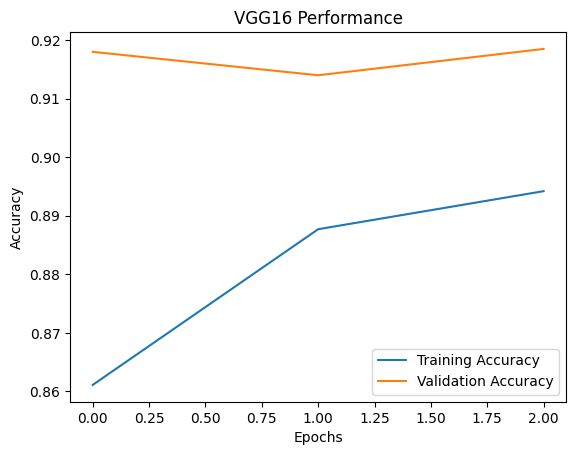

563/563 ━━━━━━━━━━━━━━━━━━━━ 142s 252ms/step - accuracy: 0.9355 - loss: 0.2007
Test Accuracy: 93.56%


0.9355555772781372

In [14]:
input_shape = IMG_SIZE + (3,)  # Input shape for the models

# Train and evaluate VGG16
print("Training VGG16...")
vgg16 = create_vgg16(input_shape, NUM_CLASSES)
vgg16_history = compile_and_train(vgg16, train_ds, val_ds, EPOCHS)
plot_training(vgg16_history, "VGG16 Performance")
evaluate_model(vgg16, test_ds)

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

# test
img_path = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/testingImages/AOI3-tile_5-2_pre_disaster.png"  # Update path as needed
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict with your trained model
prediction = vgg16.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

def load_datasets(dataset_path, img_size, batch_size):
    raw_train = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "train_another"),
        image_size=img_size,
        batch_size=batch_size
    )
    class_names = raw_train.class_names  #capture this BEFORE mapping

    normalization_layer = layers.Rescaling(1.0 / 255)
    train_dataset = raw_train.map(lambda x, y: (normalization_layer(x), y))

    val_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "validation_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    test_dataset = tf.keras.utils.image_dataset_from_directory(
        os.path.join(dataset_path, "test_another"),
        image_size=img_size,
        batch_size=batch_size
    ).map(lambda x, y: (normalization_layer(x), y))

    return train_dataset, val_dataset, test_dataset, class_names

train_ds, val_ds, test_ds, class_names = load_datasets(DATASET_PATH, IMG_SIZE, BATCH_SIZE)
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
Found 10000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 9000 files belonging to 2 classes.
Predicted class: no_damage


In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

folder = "/Users/brittaneyjin/Desktop/damage predictor repo/damage-predictor/HurricaneHarvey/test/damage"
results = {}

for file_name in os.listdir(folder):
    img_path = os.path.join(folder, file_name)
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = vgg16.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    label = class_names[predicted_class]

    results[file_name] = label

for key in results:
    print(f"{key}: {results[key]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

In [ ]:
# compare values

for keys in results:
    if results[keys] == 'no_damage':
        print(keys)

-96.897634_28.461071.jpeg
-95.078963_29.826764.jpeg
-95.633563_29.854204.jpeg
-96.934568_28.496004.jpeg
-96.866467_28.777668.jpeg
-96.872861_28.634386.jpeg
-95.656526_29.831674.jpeg
-96.888346_28.45712.jpeg
-93.800073_30.036888.jpeg
-95.080779_29.824353000000002.jpeg
-95.097127_29.842066.jpeg
-96.98546_28.785055.jpeg
-93.678446_30.205085999999998.jpeg
-96.899056_28.761097999999997.jpeg
-95.61875500000001_29.778781.jpeg
-95.617985_29.761082000000002.jpeg
-96.998337_28.532915000000003.jpeg
-96.898065_28.4596.jpeg
-95.67011600000001_29.818346999999996.jpeg
-96.917827_28.839014000000002.jpeg
-95.077515_29.826657.jpeg
-96.97191_28.787588.jpeg
-96.99995600000001_28.86675.jpeg
-95.55686800000001_29.768579.jpeg
-95.658497_29.831506.jpeg
-96.960669_28.783790999999997.jpeg
-95.55846_29.766468.jpeg
-96.995373_28.619082000000002.jpeg
-93.951802_30.128722999999997.jpeg
-96.985364_28.806690999999997.jpeg
-95.178061_30.034088.jpeg
-96.879685_28.497302.jpeg
-95.089198_29.828795.jpeg
-95.10512800000001